In [58]:
import skimage
from skimage import data
import os
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Визначаємо функцію для виділення характеристичної ознаки зображення. Тут - сума елементів гістограми мінус центральні елементи.

In [59]:
def process_image(img):
    pic = io.imread(img)
    lab_pic = skimage.color.rgb2lab(pic)
    lab_scaled = (lab_pic + [0, 128, 128]) / [100, 255, 255]
    pic_a = lab_scaled[:, :, 1]
    hist_a = np.histogram(np.concatenate(pic_a), bins=11)
    res = np.sum(np.array(hist_a[0])) - np.sum(hist_a[0][3:8])
    return pic_a, res


In [60]:
def print_image_info(img, index, pic_a, image_procession):
    print(img, end=' ')
    plt.subplot(5, 6, index)
    plt.imshow(pic_a)
    print(":- \t", image_procession, end='\t, ')
    if index % 3 == 0:
        print('', end='\n')

Створив невелику функцію яка створює  масив правильних результатів для вибірки. 

In [61]:
def create_correct_result(a, b=0):
    if b != 0:
        return np.concatenate((np.ones(a), np.zeros(b)))
    else:
        half_size = int(a / 2)
        ones = np.ones(half_size)
        zeros = np.zeros(half_size)
        return np.concatenate((ones, zeros))


Створено невелику функцію, яка друкує відсоток правильності розпізнавання, за умови що нам відомо правильні результати.

In [62]:
def check_recognition_correctness(predicted, correct_prediction):
    if predicted.shape[0] != correct_prediction.shape[0]:
        return
    correct_counter = 0
    for iterator in range(predicted.shape[0]):
        if predicted[iterator] == correct_prediction[iterator]:
            correct_counter += 1
    correct_percent = correct_counter / predicted.shape[0]
    print("recognition correctness = ", correct_percent, "% (" , correct_counter , "/", predicted.shape[0], ")")

Далі знаходимо харатристичні ознаки по наших зображеннях: 15 з зайнятим паркомісцем и 15 - з пустим

./dataset/temp10.jpg :- 	 1261	, ./dataset/temp11.jpg :- 	 7579	, ./dataset/temp12.jpg :- 	 903	, 
./dataset/temp13.jpg :- 	 7662	, ./dataset/temp14.jpg :- 	 741	, ./dataset/temp15.jpg :- 	 990	, 
./dataset/temp16.jpg :- 	 704	, ./dataset/temp17.jpg :- 	 2186	, ./dataset/temp18.jpg :- 	 1330	, 
./dataset/temp19.jpg :- 	 1089	, ./dataset/temp20.jpg :- 	 5199	, ./dataset/temp21.jpg :- 	 1786	, 
./dataset/temp22.jpg :- 	 9466	, ./dataset/temp23.jpg :- 	 11129	, ./dataset/temp24.jpg :- 	 887	, 
./dataset/temp36.jpg :- 	 170	, ./dataset/temp37.jpg :- 	 447	, ./dataset/temp38.jpg :- 	 1736	, 
./dataset/temp39.jpg :- 	 1438	, ./dataset/temp40.jpg :- 	 2315	, ./dataset/temp41.jpg :- 	 1002	, 
./dataset/temp42.jpg :- 	 553	, ./dataset/temp43.jpg :- 	 1081	, ./dataset/temp44.jpg :- 	 1258	, 
./dataset/temp45.jpg :- 	 1898	, ./dataset/temp46.jpg :- 	 659	, ./dataset/temp47.jpg :- 	 605	, 
./dataset/temp48.jpg :- 	 425	, ./dataset/temp49.jpg :- 	 282	, ./dataset/temp50.jpg :- 	 1656	, 


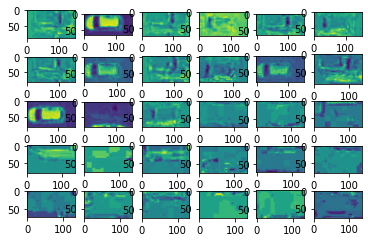

In [63]:
images = ["./dataset/temp10.jpg", "./dataset/temp11.jpg", "./dataset/temp12.jpg",
          "./dataset/temp13.jpg", "./dataset/temp14.jpg", "./dataset/temp15.jpg",
          "./dataset/temp16.jpg", "./dataset/temp17.jpg", "./dataset/temp18.jpg",
          "./dataset/temp19.jpg", "./dataset/temp20.jpg", "./dataset/temp21.jpg",
          "./dataset/temp22.jpg", "./dataset/temp23.jpg", "./dataset/temp24.jpg",
          "./dataset/temp36.jpg", "./dataset/temp37.jpg", "./dataset/temp38.jpg",
          "./dataset/temp39.jpg", "./dataset/temp40.jpg", "./dataset/temp41.jpg",
          "./dataset/temp42.jpg", "./dataset/temp43.jpg", "./dataset/temp44.jpg",
          "./dataset/temp45.jpg", "./dataset/temp46.jpg", "./dataset/temp47.jpg",
          "./dataset/temp48.jpg", "./dataset/temp49.jpg", "./dataset/temp50.jpg", ]
num = int(1)
results = []
for n in images:
    lab, proc = process_image(n)
    print_image_info(n, num, lab, proc)
    results.append(proc)

    num += 1

Формуємо вектор ознак та результату для навчання логістичної регресії

In [64]:
x = np.array(results).reshape(-1, 1)
y = create_correct_result(x.shape[0])

Навчаємо логістичну регресію та дивимося на параметр

In [65]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)
model.intercept_

array([-0.78863684])

Перевіряємо похибку на навчальній вибірці

In [66]:
check_predict = model.predict(x)
check_recognition_correctness(check_predict, y)

recognition correctness =  0.6 % ( 18 / 30 )


Обчислюємо вектор ознак та перевіряємо помилку розпізнавання для тестової вибірки

./dataset/temp25.jpg :- 	 8803	, ./dataset/temp26.jpg :- 	 9439	, ./dataset/temp27.jpg :- 	 8359	, 
./dataset/temp28.jpg :- 	 830	, ./dataset/temp29.jpg :- 	 520	, ./dataset/temp30.jpg :- 	 11236	, 
./dataset/temp31.jpg :- 	 779	, ./dataset/temp32.jpg :- 	 482	, ./dataset/temp33.jpg :- 	 2627	, 
./dataset/temp34.jpg :- 	 1939	, ./dataset/temp51.jpg :- 	 722	, ./dataset/temp52.jpg :- 	 934	, 
./dataset/temp53.jpg :- 	 468	, ./dataset/temp54.jpg :- 	 955	, ./dataset/temp55.jpg :- 	 505	, 
./dataset/temp56.jpg :- 	 821	, ./dataset/temp57.jpg :- 	 1264	, ./dataset/temp58.jpg :- 	 507	, 
./dataset/temp59.jpg :- 	 1226	, ./dataset/temp60.jpg :- 	 889	, 

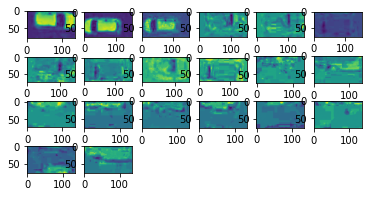

In [67]:
images = ["./dataset/temp25.jpg", "./dataset/temp26.jpg", "./dataset/temp27.jpg",
          "./dataset/temp28.jpg", "./dataset/temp29.jpg", "./dataset/temp30.jpg",
          "./dataset/temp31.jpg", "./dataset/temp32.jpg", "./dataset/temp33.jpg",
          "./dataset/temp34.jpg", "./dataset/temp51.jpg", "./dataset/temp52.jpg",
          "./dataset/temp53.jpg", "./dataset/temp54.jpg", "./dataset/temp55.jpg",
          "./dataset/temp56.jpg", "./dataset/temp57.jpg", "./dataset/temp58.jpg",
          "./dataset/temp59.jpg", "./dataset/temp60.jpg", ]
num = 1
results = []
for n in images:
    lab, proc = process_image(n)
    print_image_info(n, num, lab, proc)
    results.append(proc)
    num += 1

recognition correctness =  0.8 % ( 16 / 20 )


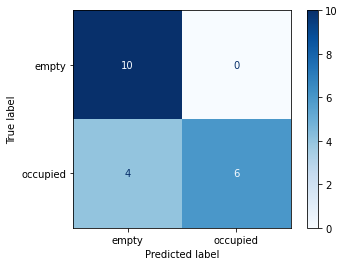

In [68]:
test_prediction = model.predict(np.array(results).reshape(-1, 1))

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

class_names = ["empty", "occupied"]

correct_prediction = create_correct_result(num)
#correct_prediction
disp = plot_confusion_matrix(model, np.array(results).reshape(-1, 1), correct_prediction,
                             display_labels=class_names,
                             cmap=plt.cm.Blues)
check_recognition_correctness(test_prediction, correct_prediction)